### Homework 4
### Due: Mar. 29 @ 11:00pm
### Adam Mischke

#### 1.Build a convolution neural network that solves the cat identification problem for the 100 image set explored above with 100% accuracy on the training data.

1. You should read the images in and  resize them down to 
just 100 x 100 pixels for this problem.
2. Your neural network should use a convolution neural network topology similar to the one used to solve the MNIST problem above.
3. Feel free to change the kernel sizes and such to limit the size of the network for feasibility of training.
4. You should not need a network with more than 10 million parameters.
5. You should not use a validation set at all for this assignment.

In [274]:
# imports for everything
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

# using a pre-trained model
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

In [275]:
# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/keras-team/keras/issues/2280#issuecomment-306959926

import os
import tensorflow as tf
import random as rn

os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(0)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(0)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(0)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [276]:
# get all the images
def grab_image(img_path, size):
    # 100px x 100px
    img = image.load_img(img_path, target_size=(size, size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    return x

# input data
X = np.concatenate([grab_image('/home/share/xception_example/images/image_%d.JPEG'%(i), size=100) for i in range(100)])

# 37 cats in there (label 1, and all else 0)
Y = np.loadtxt('/home/share/xception_example/class_labels.csv')
Y = keras.utils.to_categorical(Y)

# convert class vector [0-9] to categorial assignments (one-hot)
Y_train = keras.utils.to_categorical(Y, len(np.unique(Y)))
Y_test = keras.utils.to_categorical(Y, len(np.unique(Y)))

# 100 images, 100px X 100px, RGB color
display(X.shape)

# 100 one hot where [0,1] is a cat and [1,0] is not a cat
display(Y.shape)

(100, 100, 100, 3)

(100, 2)

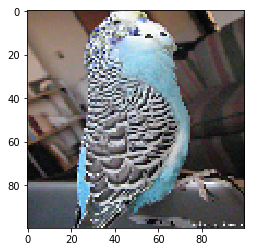

In [277]:
# show 100px x 100px
plt.imshow(image.array_to_img(X[0,:,:,:]))
plt.show()

In [278]:
# build the model
model = keras.Sequential()

# note the input size (there is only one channel - intensity)
# these images.. if you are using color images, you would need to set
# the last dimension of the input shape to 3 above and this would carry 
# into this cell

# Counting connection weights:

# 4x4 kernel size to account for 100px x 100px image reduction
# small input layer = more epochs
model.add(keras.layers.Conv2D(16, kernel_size=(4,4),
                              activation='relu',
                              input_shape=[X.shape[1],
                                           X.shape[2],
                                           X.shape[3]]))
  
# fed into a lower dimensional convolutional layer
model.add(keras.layers.Conv2D(8, (8,8), activation='relu'))
# fed into a max pooling 2x2
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# dropout 25%
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
# dense layer 64
model.add(keras.layers.Dense(32, activation='relu'))
# dropout 50%
model.add(keras.layers.Dropout(0.5))
# classify with softmax into a category
model.add(keras.layers.Dense(Y.shape[1], activation='softmax'))

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# show summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_132 (Conv2D)          (None, 97, 97, 16)        784       
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 90, 90, 8)         8200      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 45, 45, 8)         0         
_________________________________________________________________
dropout_107 (Dropout)        (None, 45, 45, 8)         0         
_________________________________________________________________
flatten_54 (Flatten)         (None, 16200)             0         
_________________________________________________________________
dense_110 (Dense)            (None, 32)                518432    
_________________________________________________________________
dropout_108 (Dropout)        (None, 32)                0         
__________

In [279]:
# train the model
batch_size = 512
epochs = 50
history = model.fit(X, Y,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1)

Epoch 1/50
100/100 [==============================] - 22s 217ms/step - loss: 0.7091 - acc: 0.5100
Epoch 2/50
100/100 [==============================] - 5s 48ms/step - loss: 0.8823 - acc: 0.6300
Epoch 3/50
100/100 [==============================] - 5s 47ms/step - loss: 1.1266 - acc: 0.3700
Epoch 4/50
100/100 [==============================] - 5s 47ms/step - loss: 0.7839 - acc: 0.4100
Epoch 5/50
100/100 [==============================] - 5s 47ms/step - loss: 0.6875 - acc: 0.5900
Epoch 6/50
100/100 [==============================] - 5s 51ms/step - loss: 0.6651 - acc: 0.7500
Epoch 7/50
100/100 [==============================] - 5s 49ms/step - loss: 0.6469 - acc: 0.6600
Epoch 8/50
100/100 [==============================] - 5s 51ms/step - loss: 0.6302 - acc: 0.6300
Epoch 9/50
100/100 [==============================] - 5s 47ms/step - loss: 0.6798 - acc: 0.6300
Epoch 10/50
100/100 [==============================] - 5s 46ms/step - loss: 0.6060 - acc: 0.6400
Epoch 11/50
100/100 [================

In [280]:
# final result - generaliztion
score = model.evaluate(X, Y, verbose=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 7s 72ms/step
Test loss: 0.030534899924
Test accuracy: 1.0


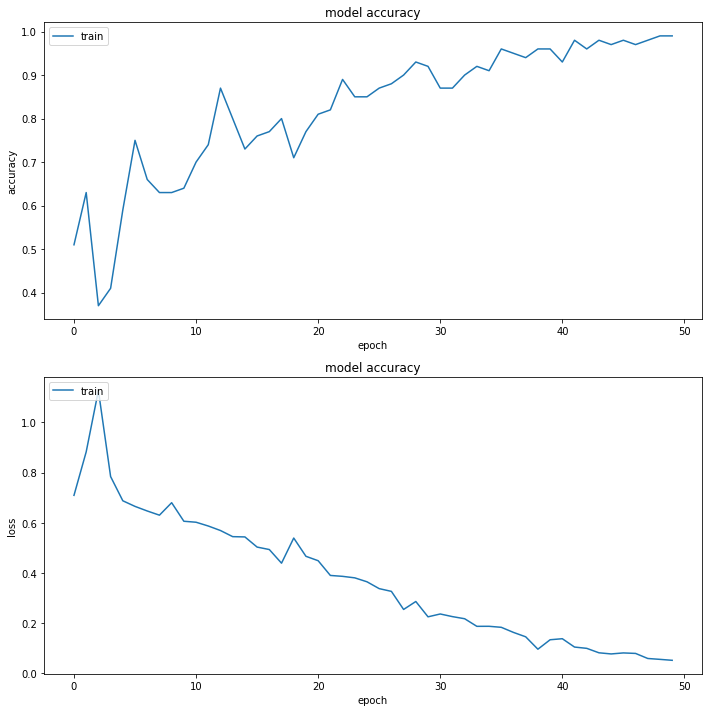

In [281]:
plt.figure(1, figsize=(10,10))

# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

plt.subplot(212)
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')

plt.tight_layout()
plt.show()

#### 3. Create an Xception network and classify all 100 of the images from the cat indentification problem using the default Xception categories.

1. You should reload the image data as 299 x 299 pixel images for this problem.
2. You should only print the topone class label for each image as decided 

In [282]:
# input data
X = np.concatenate([grab_image('/home/share/xception_example/images/image_%d.JPEG'%(i), size=299) for i in range(100)])

# 37 cats in there (label 1, and all else 0)
Y = np.loadtxt('/home/share/xception_example/class_labels.csv')
Y = keras.utils.to_categorical(Y)

# convert class vector [0-9] to categorial assignments (one-hot)
Y_train = keras.utils.to_categorical(Y, len(np.unique(Y)))
Y_test = keras.utils.to_categorical(Y, len(np.unique(Y)))

# 100 images, 299px X 299px, RGB color
display(X.shape)

# 100 one hot where [0,1] is a cat and [1,0] is not a cat
display(Y.shape)

(100, 299, 299, 3)

(100, 2)

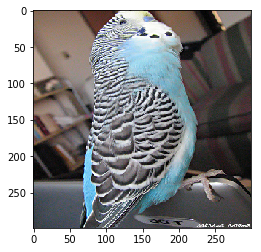

In [283]:
# show 299px x 299px
plt.imshow(image.array_to_img(X[0,:,:,:]))
plt.show()

In [284]:
# Let's load up the model
# This will load up the architecture
# and then the pre-trained weights from the
# internet...
model=Xception(weights='imagenet')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [285]:
# predict all of the pictures from our set (X) with our model (model)
preds=model.predict(X[0:,:,:,:])

# check the shape (should be 100 input set pictures, 1000 possibilites from our model)
display(preds.shape)

(100, 1000)

In [286]:
# Decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
display('Predicted:',decode_predictions(preds,top=1))

'Predicted:'

[[('n01817953', 'African_grey', 0.44841582)],
 [('n02106550', 'Rottweiler', 0.29953796)],
 [('n02395406', 'hog', 0.14157903)],
 [('n02101006', 'Gordon_setter', 0.39297754)],
 [('n02124075', 'Egyptian_cat', 0.57858533)],
 [('n02127052', 'lynx', 0.27343336)],
 [('n02107683', 'Bernese_mountain_dog', 0.97202796)],
 [('n02123394', 'Persian_cat', 0.55238426)],
 [('n02093256', 'Staffordshire_bullterrier', 0.46461865)],
 [('n02123045', 'tabby', 0.27875337)],
 [('n02123045', 'tabby', 0.24650924)],
 [('n02124075', 'Egyptian_cat', 0.21868062)],
 [('n02096585', 'Boston_bull', 0.12376153)],
 [('n02124075', 'Egyptian_cat', 0.59595364)],
 [('n02123597', 'Siamese_cat', 0.14436498)],
 [('n02107312', 'miniature_pinscher', 0.099505968)],
 [('n02106662', 'German_shepherd', 0.38143295)],
 [('n02123045', 'tabby', 0.47416711)],
 [('n04254680', 'soccer_ball', 0.81044888)],
 [('n03325584', 'feather_boa', 0.72410291)],
 [('n03793489', 'mouse', 0.10129725)],
 [('n02106166', 'Border_collie', 0.21694146)],
 [('n02

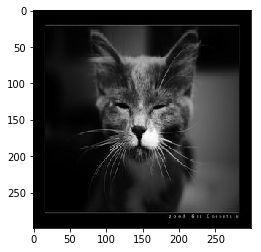

In [287]:
# The exception network did pretty well, it called the cat in 5 as an "Egyptian Cat":
plt.imshow(image.array_to_img(X[4,:,:,:]))
plt.show()

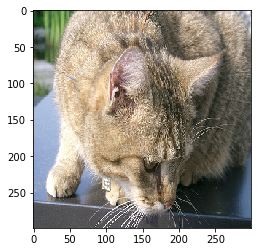

In [288]:
# The exception network did pretty well, it called the cat in 6 as an "Lynx":
plt.imshow(image.array_to_img(X[5,:,:,:]))
plt.show()

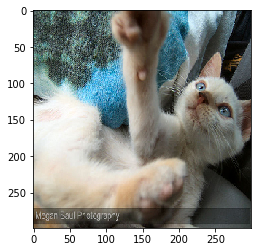

In [289]:
# The exception network did pretty well, it called the cat in 6 as an "Persian Cat":
plt.imshow(image.array_to_img(X[7,:,:,:]))
plt.show()

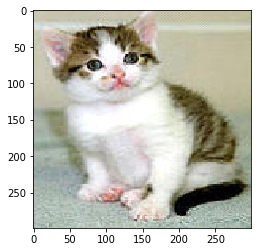

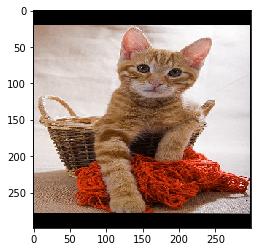

In [290]:
# The exception network did pretty well, it called the cat in 8 and 9 as as an "Tabby":
plt.imshow(image.array_to_img(X[9,:,:,:]))
plt.show()
plt.imshow(image.array_to_img(X[10,:,:,:]))
plt.show()

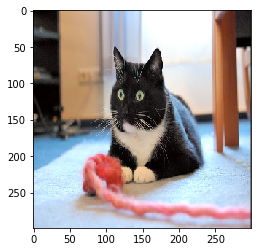

In [291]:
# The exception network did pretty well, it called the cat in 12 as as an "Siamese":
plt.imshow(image.array_to_img(X[11,:,:,:]))
plt.show()

In [293]:
# The cat labels I found:
cat_labels = ['lynx', 'tabby']
predictions = decode_predictions(preds,top=1)

# 37 cats in there (label 1, and all else 0)
Y=np.loadtxt('/home/share/xception_example/class_labels.csv')
Y=keras.utils.to_categorical(Y)

# set up the total animal array
animal_set = []

# is it a cat or no?
is_cat = [0,1]
not_cat = [1,0]

# total number of cats
num_cats=0
num_not_cats=0

# iterate over the predictions
for p in predictions:
    
    # grab the name of the animal
    name = p[0][1]
    if 'cat' in name or name in cat_labels:
        animal_set.append(is_cat)
        num_cats+=1
    else:
        animal_set.append(not_cat)
        num_not_cats +=1

# put all the animals in the set
animal_set = np.array(animal_set)

# test our animal set predictions (animal_set) with the class labels (Y)
correct=0
for test in range(0,100):
    if animal_set[test].all() == Y[test].all():
        correct+=1
    
print('Correctly classified',correct,'!')
print('Number of cats:',num_cats, 'Number of not cats:', num_not_cats)
        

Correctly classified 100 !
Number of cats: 28 Number of not cats: 72


#### Conclusion: The Xception network is incredibly powerful, correctly classifying all the cats (28) out of the set of 100. One problem with the set is classifying specific breeds and how the classifcications are somewhat ambiguous or classified poorly (lynx and tabby not having the term 'cat' in them)